# Assignment 1

**Assignment 1: Optimization**

**Goal**: ​Get familiar with gradient-based and derivative-free optimization by implementing these methods and applying them to a given function.

In this assignment we are going to learn about **gradient-based** (GD) optimization methods and **derivative-free optimization** (DFO) methods. The goal is to implement these methods (one from each group) and analyze their behavior. Importantly, we aim at noticing differences between these two groups of methods.

Here, we are interested in ​minimizing​ the following function:

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In this assignemnt, you are asked to implement:
1. The gradient-descent algorithm.
2. A chosen derivative-free algorithm. *You are free to choose a method.*

After implementing both methods, please run experiments and compare both methods. Please find a more detailed description below.

## 1. Understanding the objective

Please run the code below and visualize the objective function. Please try to understand the objective function, what is the optimum (you can do it by inspecting the plot).

If any code line is unclear to you, please read on that in numpy or matplotlib docs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [3]:
# PLEASE DO NOT REMOVE!
# The objective function.
def f(x):
    return x[:,0]**2 + 2*x[:,1]**2 -0.3*np.cos(3.*np.pi*x[:,0])-0.4*np.cos(4.*np.pi*x[:,1])+0.7

In [4]:
# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
  f_x = []
  for i in range(len(x1)):
    for j in range(len(x2)):
      f_x.append(f(np.asarray([[x1[i], x2[j]]])))
    
  return np.asarray(f_x).reshape(len(x1), len(x2))

In [5]:
# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-100., 100., 400)
x2 = np.linspace(-100., 100., 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

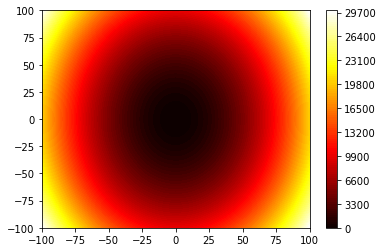

In [6]:
# PLEASE DO NOT REMOVE!
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap='hot')
plt.colorbar()

## 2. The gradient-descent algorithm

First, you are asked to implement the gradient descent (GD) algorithm. Please take a look at the class below and fill in the missing parts.

NOTE: Please pay attention to the inputs and outputs of each function.

NOTE: To implement the GD algorithm, we need a gradient with respect to $\mathbf{x}$ of the given function. Please calculate it on a paper and provide the solution below. Then, implement it in an appropriate function that will be further passed to the GD class.

**Question 1 (0-1pt):** What is the gradient of the function $f(\mathbf{x})$?

**Answer:**
\begin{align*}
\nabla_{\mathbf{x}_1} f(\mathbf{x}) &= 2x_{1}+0.9\pi \sin \left(3 \pi x_{1}\right)\\
\nabla_{\mathbf{x}_2} f(\mathbf{x}) &= 4x_{2}+1.6\pi \sin \left(4 \pi x_{2}\right) \\
\end{align*}

In [7]:
#=========
# GRADING:
# 0
# 0.5pt - if properly implemented and commented well
#=========
# Implement the gradient for the considered f(x).
def grad(x):
  #------
  # PLEASE FILL IN:
  # gradient for each x would return a list of 2 elements which are derivatives of f(x) over x1 and x2
    x1,x2 = x[0]
    x1 = 2.*x1+0.9*np.pi*np.sin(3.*np.pi*x1)
    x2 = 4.*x2+1.6*np.pi*np.sin(4.*np.pi*x2) 
    grad = np.array([[x1,x2]])
  #------
    return grad

In [8]:
#=========
# GRADING:
# 0
# 0.5pt if properly implemented and commented well
#=========
# Implement the gradient descent (GD) optimization algorithm. 
# It is equivalent to implementing the step function.
class GradientDescent(object):
  def __init__(self, grad, step_size=0.1):
    self.grad = grad
    self.step_size = step_size    

  def step(self, x_old):
    #------
    # PLEASE FILL IN:
    # the solution is equal to the old solution minused by the the current derivative of the old point
    x_new = x_old - self.grad(x_old)*self.step_size
    #------
    return x_new

In [9]:
# PLEASE DO NOT REMOVE!
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer, title):
    # Plot the objective function
    ax.contourf(x1, x2, f_x, 100, cmap='hot')

    # Init the solution
    x = np.asarray([[90., -90.]])
    x_opt = x
    # Run the optimization algorithm
    for i in range(num_epochs):
        x = optimizer.step(x)
        x_opt = np.concatenate((x_opt, x), 0)
    ax.plot(x_opt[:,0], x_opt[:,1], linewidth=3.)
    ax.set_title(title)

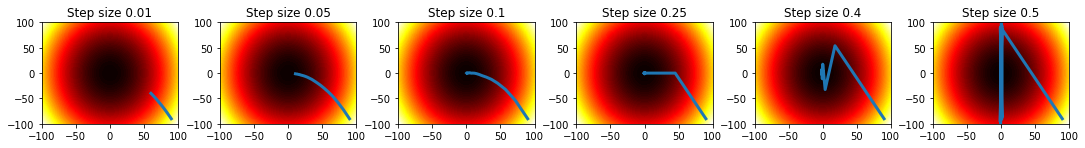

In [10]:
# PLEASE DO NOT REMOVE!
# This piece of code serves for the analysis.
# Running the GD algorithm with different step sizes
num_epochs = 20 # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5] # the step sizes

# plotting the convergence of the GD
fig_gd, axs = plt.subplots(1,len(step_sizes),figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
  # take the step size
  step_size = step_sizes[i]
  # init the GD
  gd = GradientDescent(grad, step_size=step_size)
  # plot the convergence
  plot_optimization_process(axs[i], optimizer=gd, title='Step size ' + str(gd.step_size))

**Question 2 (0-0.5pt)**: Please analyze the plots above and comment on the behavior of the gradient-descent for different values of the step size.

**Answer**: First, the optimal surface is convex; thus, the gradient descent possibly found the global optimum. In general, the larger the step is, the earlier the model reaches the optimal solution within the 20 iterations. With respect to step size as 0.01, it was obviously seen that the model is extremely biased from the central point and does have sufficient time to maximize the parameters of the model. If we accelerate the speed into 0.05, the model, clearly, moved closer to the black hole of the loss surface, but possibly still not reach the global minimum. In terms of the step size as 0.1, it is apparently concluded that the parameters of the model satisfied the target of the objective function. We could observe that the last point in the search path reach the fairly central point. Nevertheless, if we keep fastening the step size, it led to an adversarial effect in the learning process. Insteads of more rapid convergence, more variances are observed in the searching path. Its effect is more visible in step size 0.4 and especially 0.5. When learning with the rate as 0.4, the searching path fluctuated frequently around the optimal point before its convergence, it creates an unneccessary waste for the computational power. Additionally, with the step size 0.5, the ultimate result possibly overrshoot the global optimal solution, which should be avoidable in training machine learning model.


**Question 3 (0-0.5pt)**: What could we do to increase the convergence when the step size equals 0.01? What about when the step size equals 0.5?

**Answer**: The following step is established based on the gradient descent of the current point and the given learning rate. While the gradient descent indicates the direction of the susequent step, the learning rate specifies the largeness of the step. So as to increase the convergence of the learning process, we possibly manipulate the step size or the number of epochs. The situation when the learning rate is set as 0.01, we are able to enlarge the step into 0.1 or increase the number of epochs into 100 iterations. Consequently, the model has adequate times to learn the objective functions. Contrastly, when the learning rate is as large as 0.5, we definitely dimish the learning ability by an approriate amount such as 0.2 or 0.3 but the decline in this situation feasbily facilitate the learning process since the more frequent exposure to the objective function results in the better model.

## 3. The derivative-free optimization

In the second part of this assignment, you are asked to implement a derivative-free optimziation (DFO) algorithm. Please notice that you are free to choose any DFO method you wish.
Moreover, you are encouraged to be as imaginative as possible! Do you have an idea for a new method or combine multiple methods? Great! 

**Question 4 (0-0.5-1-1.5-2-2.5-3pt)**: Please provide a description (a pseudocode) of your DFO method here.

*NOTE (grading): Please keep in mind: start simple, make sure your approach works. You are encouraged to use your creativity and develop more complex approaches that will influence the grading. TAs will also check whether the pseudocode is correct.*

**Answer:** The suggested derivative-free method is negative hill climbing with the fixed intial point.

*Input:* the first coordinate of the optimal solution list (x_opt)

1. Sample a potential candidate randomly within the circle bounding the current point and the radius is drawn from the normal distribution of step size 
2. Check if the potential candidate is in the bound of the state space
3. Return the potential candidate as the following optimal solution if its evaluation is smaller or equal to the current evaluation. 
4. Otherwises, withdraw another candidate
 
**Note:** 
    Since some expermients proved that all the given step sizes are not large enough for the model to reach the optimum; thus, I increase the number of iterations into 100 times to allow the more detailed learning process.

In [11]:
#=========
# GRADING: 0-0.5-1-1.5-2pt
# 0
# 0.5pt the code works but it is very messy and unclear
# 1.0pt the code works but it is messy and badly commented
# 1.5pt the code works but it is hard to follow in some places
# 2.0pt the code works and it is fully understandable
#=========
# Implement a derivative-free optimization (DFO) algorithm. 
# REMARK: during the init, you are supposed to pass the obj_fun and other objects that are necessary in your method.

random.seed(1)
class DFO(object):
    def __init__(self, obj_fun, step_size):
        self.obj_fun = obj_fun
        self.step_size = step_size
        # define the bounds for each variable (dimension)
        self.bounds = np.array([[-100,100],[-100,100]])
        
    # function would check whether the point is in the bounds of the state space 
    def in_bounds(self,x):
        # for each dimension of x
        for i in range(len(self.bounds)):
            # if the value of one dimension is out of the input range
            if x[0,i] < self.bounds[i,0] or x[0,i] > self.bounds[i,1]:
                # return the given candidate is not in bound of the state space
                return False
        # return the given candidate is in bound of the state space
        return True
        
    # function sample a next candidate for the model
    def sample_candidate(self,x_old):
        # sample a new point within the circle centered by the current point and the radius drawn from the normal distribution of the stepsize
        return x_old + self.step_size*random.randn(len(self.bounds))
    
    # This function MUST be implemented.
    # No additional arguments here!    
    def step(self,x_old):
        # create a new step
        candidate = self.sample_candidate(x_old)
        # compute the evaluation of the candidate
        candidate_eval = self.obj_fun(candidate)
        # compute the evaluation of the current point
        solution_eval = self.obj_fun(x_old)
        # if the candidate is not in bound of the state space
        # or the evalutaion of the candidate is larger than that of the current optimum
        while not(self.in_bounds(candidate)) or candidate_eval > solution_eval:
            # resample a new candidate
            candidate = self.sample_candidate(x_old)
            # evaluate candidate
            candidate_eval = self.obj_fun(candidate)
        # if the evalation of the candidate is smaller than that of the current solution
        # return it as a current optimum
        x_new = candidate
        return x_new

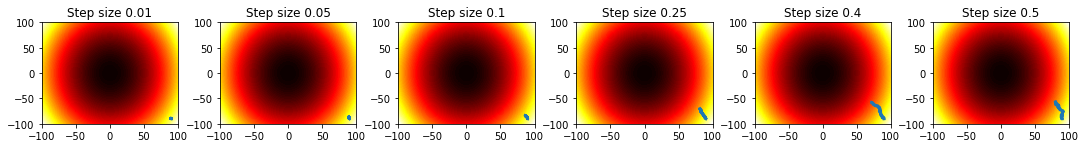

In [19]:
# PLEASE DO NOT REMOVE!
# Running the DFO algorithm with different step sizes
num_epochs = 100 # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5] # the step sizes

## Here all hyperparameters go.
## Please analyze at least one hyperparameter in a similar manner to the 
## step size in the FDO algorithm.
fig_dfo, axs = plt.subplots(1,len(step_sizes),figsize=(15, 2))
fig_dfo.tight_layout()

for i in range(len(step_sizes)):
    # take the step size
    step_size = step_sizes[i]
    # init the FDO
    dfo = DFO(f, step_size=step_size)
    # plot the convergence
    plot_optimization_process(axs[i], optimizer=dfo, title='Step size ' + str(dfo.step_size))



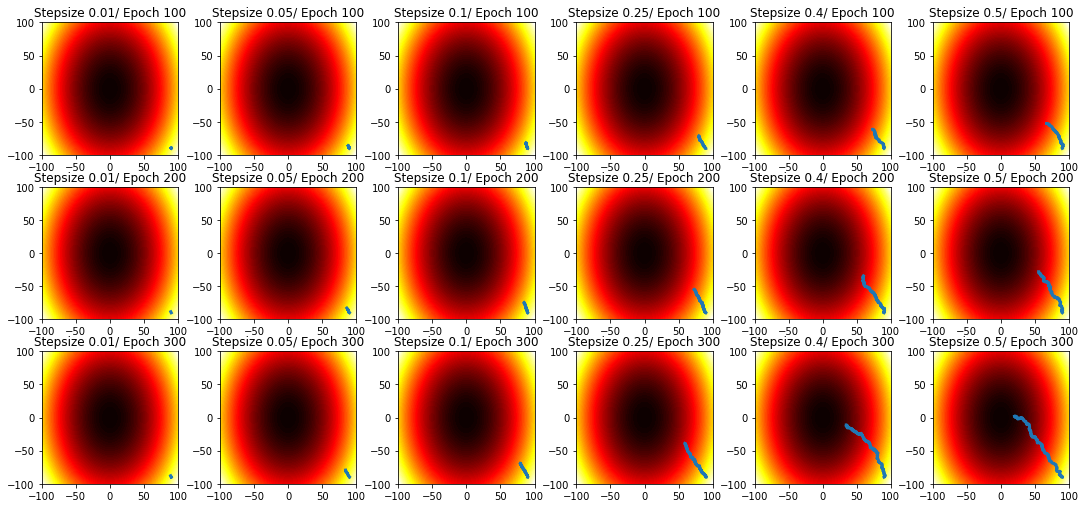

In [39]:
# PLEASE DO NOT REMOVE!
# Running the DFO algorithm with different step sizes
epochs = [100,200,300] # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5] # the step sizes

## PLEASE FILL IN
## Here all hyperparameters go.
## Please analyze at least one hyperparameter in a similar manner to the 
## step size in the FDO algorithm.
fig_dfo, axs = plt.subplots(len(epochs),len(step_sizes),figsize=(15, 7))
fig_dfo.tight_layout()
for j in range(len(epochs)):
    num_epochs = epochs[j]
    for i in range(len(step_sizes)):
        # take the step size
        step_size = step_sizes[i]
        # init the FDO
        dfo = DFO(f, step_size=step_size)
        # plot the convergence
        plot_optimization_process(axs[j,i], optimizer=dfo, title='Stepsize ' + str(dfo.step_size) + '/ Epoch ' + str(num_epochs))

**Question 5 (0-0.5-1pt)** Please comment on the behavior of your DFO algorithm. What are the strong points? What are the (potential) weak points? During working on the algorithm, what kind of problems did you encounter?

**Answer:** Generally, the DFO algorithm is a sustainable learner. Although it took more iterations to reach the optimum, but the models are less variant in the searching path. When given 100 rounds for training, the model were unable to gain the optimum with a wide range of step size. Similarly, when the number of iterations was increased to 200, they were not possible to move closer to the darkest region. Yet the epochs were set to 300, they finalised in the approximate center of the dark region. One important success is that the model did not overshoot the optimum. Nonetheless, the computation is so expensive, especially in more complicated objective function. Since the direction of the next step is randomly chosen, some of them are not totally inaccurate and it takes more times to move backward to the target. When addressing the problem with the derivative-free method, if the epochs were set too large, so the searching process would be in the infinite loop of finding the potential candidate. The reason is when the optimum is accomplished, the model definitely can not find another point whose evaluation is smaller than that of the optimum. Thus, I must set the number of epoch to an approriate number. Certainly, this mistake can be addressed by a small logical change in the future.

## 4. Final remarks: GD vs. DFO

Eventually, please answer the following last question that will allow you to conclude the assignment draw conclusions.

**Question 6 (0-0.5pt)**: What are differences between the two approaches?

**Answer**: All the judgements are based on my experiments. The first distinguished point is that the DFO algorithm does not overshoot the optimum while the gradient method does with the sufficiently large step size. The second points is that the DFO algorithm takes more effort to search the optimum when compared to the gradient descent method. The considerable evdence is that with the stepsize as 0.1, the gradient method found the optimum within 20 rounds wheares the negative hill climbing method was unable to reach the goal with 300 iterations. The last point is that the variance between optimal solution of gradient descent method is more flutuacted than that of the DFO method.   

**Question 7 (0-0.5)**: Which of the is easier to apply? Why? In what situations? Which of them is easier to implement in general?

**Answer**: From my perspective, the DFO algorithm is more generally applicable than the gradient descent since it possibly works for discrete and continuous state space. If we train a random forest, the gradient descent worths no means because we cannot take the derivative of the function. However, if the given problem is related to the continuous variables, the gradient descent would be an approriate solution since it takes less computation in searching process and it gives a particular dimension where the loss would be dropped. Thus, it proves a more efficient performance wihout the chance of randomness.